In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


###Data Exploration


In [2]:
df = pd.read_csv('/content/time_series_data_human_activities.csv')
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [3]:
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


(None,
    user activity      timestamp  x-axis  y-axis  z-axis
 0     1  Walking  4991922345000    0.69   10.80   -2.03
 1     1  Walking  4991972333000    6.85    7.44   -0.50
 2     1  Walking  4992022351000    0.93    5.63   -0.50
 3     1  Walking  4992072339000   -2.11    5.01   -0.69
 4     1  Walking  4992122358000   -4.59    4.29   -1.95)

In [4]:
df.shape

(1073623, 6)

In [5]:
df_sampled = df.sample(frac=0.2, random_state=42) #Saving only 20% randomly

In [6]:
df_sampled.shape

(214725, 6)

In [7]:
df_sampled['activity'].nunique()

6

In [8]:
df['activity'].value_counts()

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64

In [9]:
df_sampled['activity'].value_counts()

Walking       83418
Jogging       65138
Upstairs      24350
Downstairs    20129
Sitting       12099
Standing       9591
Name: activity, dtype: int64

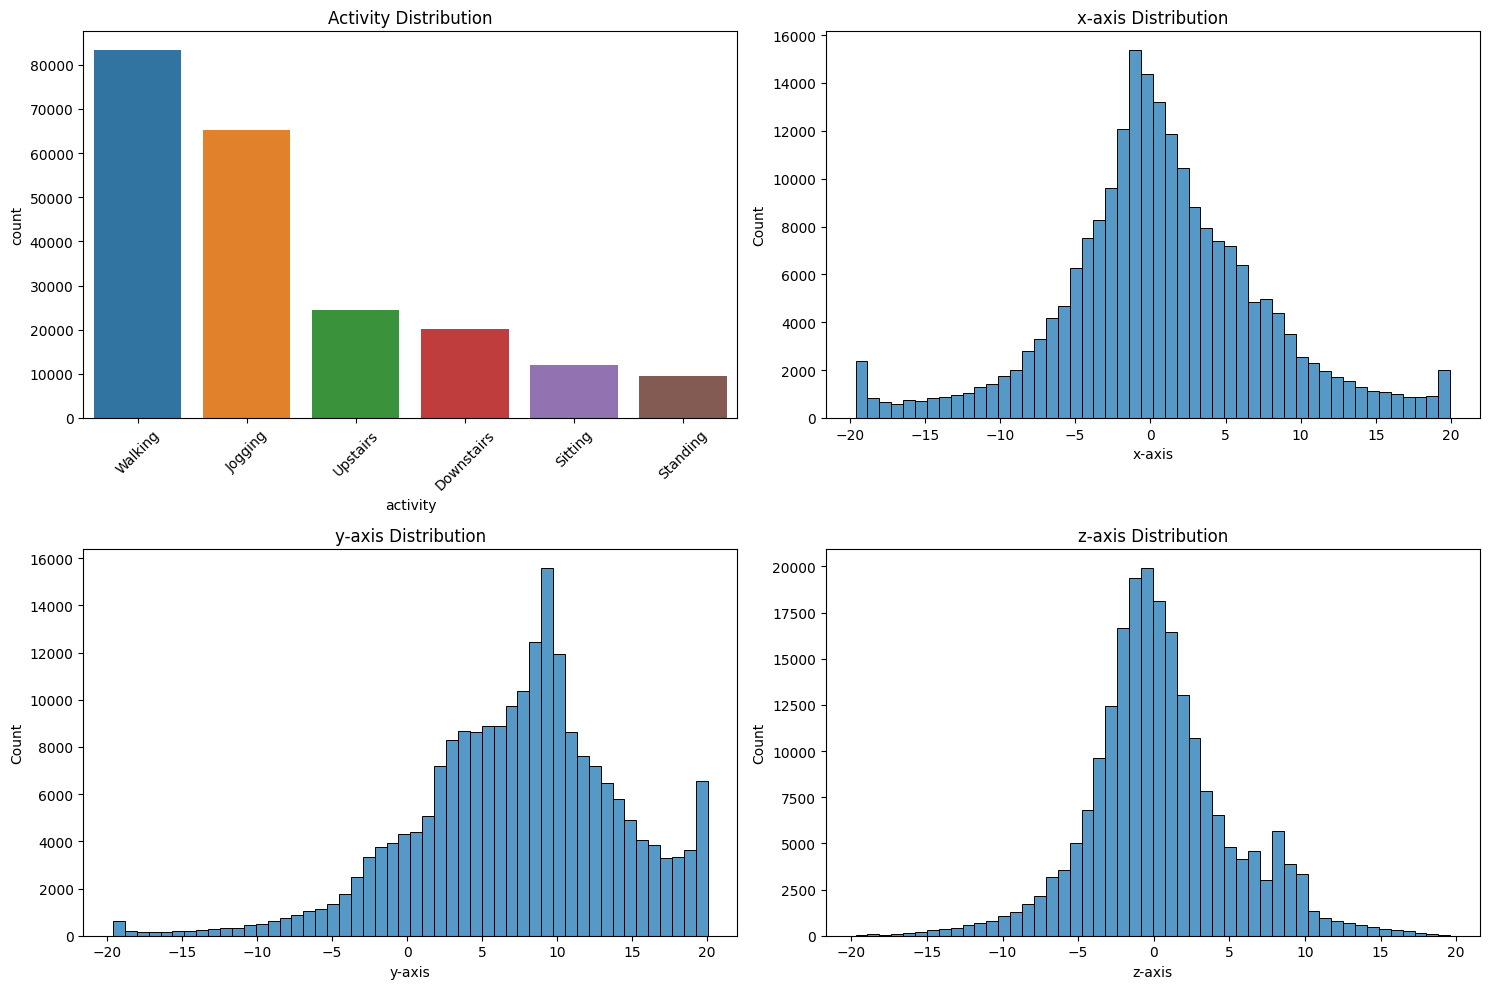

In [10]:
plt.figure(figsize=(15, 10))

# Plot the distribution of activities
plt.subplot(2, 2, 1)
sns.countplot(data=df_sampled, x='activity', order=df_sampled['activity'].value_counts().index)
plt.title('Activity Distribution')
plt.xticks(rotation=45)

# Plot the distribution of x-axis, y-axis, and z-axis sensor data
for idx, axis in enumerate(['x-axis', 'y-axis', 'z-axis'], 2):
    plt.subplot(2, 2, idx)
    sns.histplot(df_sampled[axis], bins=50)
    plt.title(f'{axis} Distribution')

plt.tight_layout()
plt.show()

In [11]:
label_encoder = LabelEncoder()
df_sampled['activity_encoded'] = label_encoder.fit_transform(df_sampled['activity'])

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sampled[['x-axis', 'y-axis', 'z-axis']])

In [13]:
X = scaled_features
y = to_categorical(df_sampled['activity_encoded'])

In [14]:
#Splitting Test, Validation, and Training Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

###Ran with only 20% Data and using dropout layer to prevent overfitting

In [15]:
#feed-forward model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2)) #Dropout layer wiht 20% drop out rate
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [16]:
#This compiles the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#Training Data
model.fit(X_train, y_train, epochs=8, batch_size=24, validation_data=(X_val, y_val))

Epoch 1/8
6263/6263 [==============================] - 46s 6ms/step - loss: 1.0940 - accuracy: 0.5797 - val_loss: 1.0256 - val_accuracy: 0.6076
Epoch 2/8
6263/6263 [==============================] - 32s 5ms/step - loss: 1.0283 - accuracy: 0.6025 - val_loss: 1.0042 - val_accuracy: 0.6126
Epoch 3/8
6263/6263 [==============================] - 31s 5ms/step - loss: 1.0149 - accuracy: 0.6079 - val_loss: 0.9898 - val_accuracy: 0.6143
Epoch 4/8
6263/6263 [==============================] - 30s 5ms/step - loss: 1.0065 - accuracy: 0.6097 - val_loss: 0.9922 - val_accuracy: 0.6172
Epoch 5/8
6263/6263 [==============================] - 33s 5ms/step - loss: 1.0020 - accuracy: 0.6117 - val_loss: 0.9842 - val_accuracy: 0.6213
Epoch 6/8
6263/6263 [==============================] - 30s 5ms/step - loss: 0.9976 - accuracy: 0.6138 - val_loss: 0.9784 - val_accuracy: 0.6201
Epoch 7/8
6263/6263 [==============================] - 32s 5ms/step - loss: 0.9958 - accuracy: 0.6153 - val_loss: 0.9803 - val_accuracy:

In [18]:
#Trying two more epochs to see
model.fit(X_train, y_train, epochs=2, batch_size=24, validation_data=(X_val, y_val))

Epoch 1/2
6263/6263 [==============================] - 32s 5ms/step - loss: 0.9903 - accuracy: 0.6167 - val_loss: 0.9781 - val_accuracy: 0.6212
Epoch 2/2
6263/6263 [==============================] - 32s 5ms/step - loss: 0.9885 - accuracy: 0.6173 - val_loss: 0.9737 - val_accuracy: 0.6244


###Model trained with 50% of original data, no dropout layers

In [19]:
df_sampled_50 = df.sample(frac=0.5, random_state=42) #Saving 50% randomly

label_encoder = LabelEncoder()
df_sampled_50['activity_encoded'] = label_encoder.fit_transform(df_sampled_50['activity'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sampled_50[['x-axis', 'y-axis', 'z-axis']])

X = scaled_features
y = to_categorical(df_sampled_50['activity_encoded'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(y_train.shape[1], activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
11743/11743 [==============================] - 61s 5ms/step - loss: 1.0426 - accuracy: 0.6000 - val_loss: 1.0087 - val_accuracy: 0.6144
Epoch 2/10
11743/11743 [==============================] - 51s 4ms/step - loss: 0.9889 - accuracy: 0.6193 - val_loss: 0.9833 - val_accuracy: 0.6203
Epoch 3/10
11743/11743 [==============================] - 65s 6ms/step - loss: 0.9804 - accuracy: 0.6216 - val_loss: 0.9773 - val_accuracy: 0.6238
Epoch 4/10
11743/11743 [==============================] - 52s 4ms/step - loss: 0.9752 - accuracy: 0.6236 - val_loss: 0.9761 - val_accuracy: 0.6221
Epoch 5/10
11743/11743 [==============================] - 58s 5ms/step - loss: 0.9713 - accuracy: 0.6246 - val_loss: 0.9723 - val_accuracy: 0.6238
Epoch 6/10
11743/11743 [==============================] - 56s 5ms/step - loss: 0.9680 - accuracy: 0.6259 - val_loss: 0.9672 - val_accuracy: 0.6263
Epoch 7/10
11743/11743 [==============================] - 50s 4ms/step - loss: 0.9657 - accuracy: 0.6270 - val_loss: 0

In [21]:
#It kept learning by the end so let's try some more epochs!
model_2.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/3
11743/11743 [==============================] - 52s 4ms/step - loss: 0.9592 - accuracy: 0.6288 - val_loss: 0.9644 - val_accuracy: 0.6259
Epoch 2/3
11743/11743 [==============================] - 56s 5ms/step - loss: 0.9579 - accuracy: 0.6289 - val_loss: 0.9621 - val_accuracy: 0.6266
Epoch 3/3
11743/11743 [==============================] - 57s 5ms/step - loss: 0.9566 - accuracy: 0.6292 - val_loss: 0.9641 - val_accuracy: 0.6253


###Shallow Layered FFNN


In [22]:
df_sampled = df.sample(frac=0.2, random_state=42) #Saving only 20% randomly

X = df_sampled[['x-axis', 'y-axis', 'z-axis']].values
y = df_sampled['activity'].values

y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

model_3 = Sequential()
model_3.add(Dense(y_onehot.shape[1], input_dim=X_train.shape[1], activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
4295/4295 [==============================] - 18s 4ms/step - loss: 1.9970 - accuracy: 0.4294 - val_loss: 1.4000 - val_accuracy: 0.4729
Epoch 2/10
4295/4295 [==============================] - 16s 4ms/step - loss: 1.4005 - accuracy: 0.4745 - val_loss: 1.3989 - val_accuracy: 0.4739
Epoch 3/10
4295/4295 [==============================] - 17s 4ms/step - loss: 1.4002 - accuracy: 0.4722 - val_loss: 1.4023 - val_accuracy: 0.4675
Epoch 4/10
4295/4295 [==============================] - 19s 4ms/step - loss: 1.4004 - accuracy: 0.4742 - val_loss: 1.3995 - val_accuracy: 0.4719
Epoch 5/10
4295/4295 [==============================] - 16s 4ms/step - loss: 1.4005 - accuracy: 0.4732 - val_loss: 1.3983 - val_accuracy: 0.4737
Epoch 6/10
4295/4295 [==============================] - 16s 4ms/step - loss: 1.4005 - accuracy: 0.4741 - val_loss: 1.4001 - val_accuracy: 0.4725
Epoch 7/10
4295/4295 [==============================] - 17s 4ms/step - loss: 1.4006 - accuracy: 0.4748 - val_loss: 1.3988 - val_ac

###RF Model


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['user', 'timestamp', 'activity'])
y = df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_4 = RandomForestClassifier(random_state=42)
model_4.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

###Testing Code

In [25]:
#Apriori/Baseline Accuracy
baseline = np.round(72522/182397 * 100, 2)
print(baseline, '%') #This is the baseline accuracy

39.76 %


In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Model_1 with 20% and dropout layers ', f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


1343/1343 [==============================] - 4s 3ms/step - loss: 19.0506 - accuracy: 0.2981
Model_1 with 20% and dropout layers  Test Loss: 19.050594329833984, Test Accuracy: 0.2981487810611725


In [27]:
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
print('Model_2 with 50% ', f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

1343/1343 [==============================] - 4s 3ms/step - loss: 46.1742 - accuracy: 0.2973
Model_2 with 50%  Test Loss: 19.050594329833984, Test Accuracy: 0.2981487810611725


In [28]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

1343/1343 [==============================] - 4s 3ms/step - loss: 1.4033 - accuracy: 0.4665
Test Accuracy: 0.4664570987224579


In [31]:
y_pred = model_4.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.636735359180347